Credit Card Fraud Detection using Machine Learning


## Problem Statement
The goal of this project is to build a machine learning model that can detect fraudulent credit card transactions.  
The dataset is highly imbalanced, with very few fraud cases compared to normal transactions.


## Import Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve


## Load Dataset


In [2]:
data = pd.read_csv("creditcard.csv")
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.shape


(284807, 31)

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Class Distribution


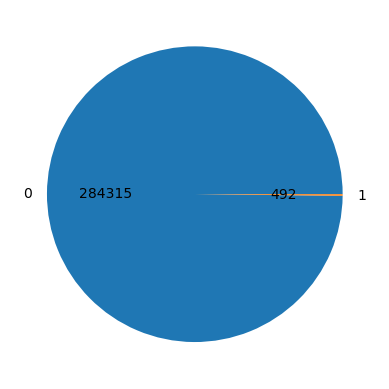

In [9]:
import matplotlib.pyplot as plt

data['Class'].value_counts().plot.pie(autopct=lambda x: int(x*data['Class'].value_counts().sum()/100))
plt.ylabel('')
plt.show()


In [10]:
X = data.drop('Class', axis=1)
y = data['Class']


## Feature Scaling


In [12]:
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])


## Train-Test Split


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


## Handling Imbalanced Data (Undersampling)


In [15]:
train_data = pd.concat([X_train, y_train], axis=1)

fraud = train_data[train_data['Class'] == 1]
normal = train_data[train_data['Class'] == 0].sample(len(fraud), random_state=42)

balanced_data = pd.concat([fraud, normal])
balanced_data = balanced_data.sample(frac=1, random_state=42)

X_train_bal = balanced_data.drop('Class', axis=1)
y_train_bal = balanced_data['Class']


## Logistic Regression Model


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

lr_model = LogisticRegression(max_iter=2000)
lr_model.fit(X_train_scaled, y_train_bal)

lr_preds = lr_model.predict(X_test_scaled)


## Logistic Regression Evaluation


In [19]:
print(confusion_matrix(y_test, lr_preds))
print(classification_report(y_test, lr_preds))
print("ROC-AUC:", roc_auc_score(y_test, lr_model.predict_proba(X_test_scaled)[:,1]))


[[55209  1655]
 [    8    90]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962

ROC-AUC: 0.9751917930931517


In [20]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_bal, y_train_bal)

rf_preds = rf_model.predict(X_test)


In [21]:
print(confusion_matrix(y_test, rf_preds))
print(classification_report(y_test, rf_preds))
print("ROC-AUC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1]))


[[54830  2034]
 [    9    89]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.91      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962

ROC-AUC: 0.9732909993626039


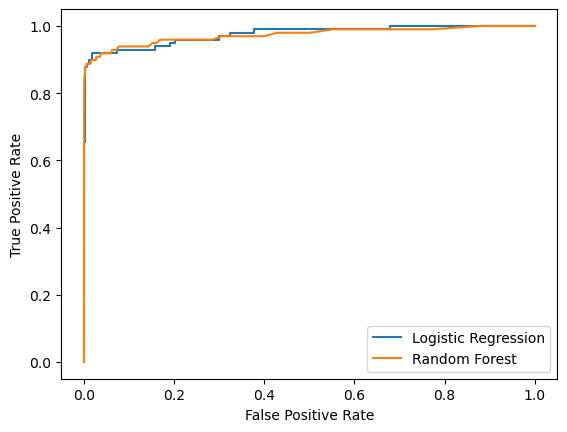

In [23]:
lr_probs = lr_model.predict_proba(X_test_scaled)[:,1]
rf_probs = rf_model.predict_proba(X_test)[:,1]

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

plt.plot(lr_fpr, lr_tpr, label="Logistic Regression")
plt.plot(rf_fpr, rf_tpr, label="Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [24]:
import joblib
joblib.dump(rf_model, "fraud_model.pkl")


['fraud_model.pkl']